# African Proverbs Generator

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Imports

In [2]:
from fastai import *
from fastai.text import *

### Preparing the data

In [3]:
path = Path('data/')

In [4]:
path.ls()

[PosixPath('data/models'),
 PosixPath('data/data_lm.pkl'),
 PosixPath('data/.ipynb_checkpoints'),
 PosixPath('data/proverbs')]

In [5]:
df = pd.read_csv(path/'proverbs', delimiter='\n', header=None);
df.head()

,0
0,"When thou seest the palm-tree, the palm-tree h..."
1,The child looks everywhere and often sees noug...
2,The diver-bird cannot catch fish behind his co...
3,"What the child says, he has heard it at home."
4,The great calabash-tree has had seed for its m...


In [6]:
df.columns = ['text']
df.head()

,text
0,"When thou seest the palm-tree, the palm-tree h..."
1,The child looks everywhere and often sees noug...
2,The diver-bird cannot catch fish behind his co...
3,"What the child says, he has heard it at home."
4,The great calabash-tree has had seed for its m...


In [7]:
len(df)

2344

In [8]:
data_lm = (TextList.from_df(df, path, cols=['text'])
           .random_split_by_pct(0.01)
           .label_for_lm() 
           .databunch())

In [9]:
data_lm.show_batch()

idx,text
0,"xxmaj the great calabash - tree has had xxunk for its mother . xxbos xxmaj if only the small measure goes to the xxunk , the millet will last long . xxbos xxmaj if the dog is not at home , he xxunk not . xxbos xxmaj the house - roof xxunk with the rain , but he who is xxunk xxunk it . xxbos xxmaj know thyself better than"
1,"- bundles falls with the ears , and if thou dost not eat them thou wilt be the xxunk xxunk with eating them . xxbos a woman who has lost her rival has no xxunk . xxbos a xxunk king is no king . xxbos xxmaj he who wishes to blow out his brains , need not fear their being xxunk out by others . xxbos xxmaj much soup is"
2,"xxbos xxmaj the sun is the king of xxunk . xxbos xxmaj if you go to the xxunk ' xxunk , take ears of corn for them . xxbos xxmaj before xxunk , one must reach . xxbos xxmaj he who cries to have himself xxunk , has no one to carry him . xxbos xxmaj all the xxunk of a tree do not produce fruit . xxbos xxmaj he"
3,"the xxunk xxunk only what it finds in its mother 's xxunk . xxbos xxmaj he who has no xxunk , shows his stomach . xxbos xxmaj he who has goods can sell them . xxbos xxmaj before xxunk , one must have xxunk . xxbos xxmaj one laughs not without cause . xxbos xxmaj before xxunk , one must xxunk . xxbos xxmaj if you have a horse ,"
4,"xxbos xxmaj no one cuts the serpent 's xxunk . xxbos xxmaj if you xxunk on the serpent , no one will say to you , "" xxmaj do n't ! "" xxbos xxmaj if the child xxunk when he begins to walk , he will xxunk a xxunk when he grows xxunk . xxbos xxmaj to place oneself before the sun , does not prevent its xxunk its path"


In [10]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 8.32E-02


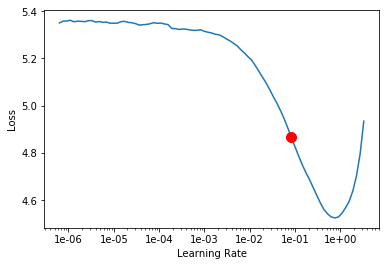

In [12]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(10, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.904985,4.060028,0.286607
2,4.233602,3.326746,0.344420
3,3.776543,3.373044,0.336830
4,3.473608,3.476948,0.320536
5,3.236699,3.605470,0.318750
6,3.024233,3.570161,0.333036
7,2.829592,3.612757,0.350000
8,2.649714,3.639558,0.347768
9,2.492540,3.645737,0.345982
10,2.362700,3.650918,0.349554


In [14]:
learn.save('fit_head')

In [15]:
learn.load('fit_head');

### Unfreeze and fine tune

In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-02


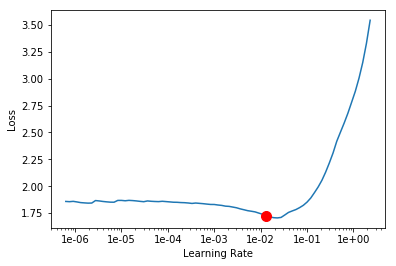

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(10, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,1.808152,3.808008,0.350223
2,1.740032,3.996998,0.327679
3,1.688156,4.126180,0.337946
4,1.558063,4.303443,0.326116
5,1.396939,4.343343,0.344643
6,1.256592,4.457887,0.324777
7,1.131324,4.424724,0.337946
8,1.031195,4.460035,0.334821
9,0.948503,4.423301,0.340848
10,0.889459,4.435097,0.334598


In [20]:
learn.save('fine-tuned')

In [27]:
TEXT = "Love"
N_WORDS = 40
N_SENTENCES = 2

In [28]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.80) for _ in range(N_SENTENCES)))

Love the one who loves you . xxbos They who have seen a thing once , say they it ’s . xxbos The monkey saith , " My eye is my knowledge . " xxbos The
Love the one who loves you . xxbos The young that have left the house , has no word . xxbos a bird which does not get feathers , quickly it learns to fly . xxbos He is who


In [23]:
TEXT = "The child"
N_WORDS = 40
N_SENTENCES = 2

In [24]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

The child of a slave is the queen of the mother and father . xxbos He who did not go to the bush with his father ends up being tied up using a razor . xxbos The rain shall not
The child of a generous person never deceives one . xxbos If wood does not be hurt , it is not afraid to be carried on . xxbos If you go to the without working , you will not seek


In [31]:
len(df)

2344

### Average number of words per proverb

In [42]:
total = 0
for index, row in df.iterrows():
    total += len(row[0].split())
    
total / 2344

11.675341296928327

In [54]:
TEXTS = ["When the","It is","A man","If the","He who", "There is", "I am"]
N_WORDS = 15

In [55]:
print("\n".join(str(i+1) + ". " + learn.predict(TEXTS[i], N_WORDS,no_unk=True,
                                                temperature=0.85) for i in range(len(TEXTS))))

1. When the wolf goes to the sheep , the sheep must fly . xxbos You can
2. It is the sea only which knows the bottom of the ship , so God only
3. A man is not lean without cause . xxbos The family is like a Poured
4. If the King has no king , he will bring you into a way . xxbos
5. He who did not climb can not eat from the top of the branches . xxbos
6. There is no worse curse than to desire a man 's death . xxbos The palm
7. I am annoyed by the wake of a dark , as if the voice of the


In [56]:
print("\n".join(str(i+1) + ". " + (learn.beam_search(TEXTS[i], N_WORDS, temperature=0.75,
                                                     top_k=10,beam_sz=30)).replace('Xxunk','').replace('xxunk','') for i in range(len(TEXTS))))

1. When the moon refuses food , he eats it with the fowl ; if the fowl gets
2. It is better to drink blood that has no milk than to sleep hungry . xxbos
3. a man who touches what you have shut up , should not dwell with you . xxbos
4. If the child does not hear his mother 's and his father 's word , he shall
5. He who is done eating will say , " He who eats at night is a
6. There is no worse curse than to desire a man 's death . xxbos He who
7. i am afraid to be born , i am not afraid to be carried away . xxbos
